In [1]:
%matplotlib inline
import seaborn as sns

In [2]:
from __future__ import unicode_literals
from __future__ import division
from __future__ import print_function

import os

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 300)
pd.set_option("max_colwidth",1000)


In [3]:
bed_headers = ["chrom",
               "chromStart",
               "chromEnd",
               "name",
               "score",
               "strand",
               "thickStart",
               "thickEnd",
               "itemRgb",
               "blockCount",
               "blockSizes",
               "blockStarts"]

# Files

In [4]:
gfusi13_ = "/home/gus/MEGAsync/zim/main/Yale/Collaborations/Hongyu-tsetse/gmm_to_gff_pipeline/pipeline_prep/produced/Glossina-fuscipes-IAEA_BASEFEATURES_GfusI1.3.sorted.bed"

In [5]:
gfusi13 = pd.read_csv(gfusi13_, sep='\t', names=bed_headers)

In [6]:
gfusi13.head()

,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts
0,JFJR01006593,4031,10761,GFUI000004,0,+,4031,10758,"0,0,0",6,"75,33,33,79,12,74","0,151,700,1271,5027,6656"
1,JFJR01006593,35986,48146,GFUI000006,0,-,35989,48146,"0,0,0",7,"166,67,28,17,91,20,16","0,763,3341,4858,8457,8629,12144"
2,JFJR01006593,59266,71732,GFUI000002,0,+,59450,71729,"0,0,0",9,"476,84,111,134,112,87,488,297,3906","0,587,6226,6407,7261,7464,7636,8182,8560"
3,JFJR01006593,95368,98696,GFUI000008,0,+,95601,98523,"0,0,0",4,"287,183,1962,710","0,350,592,2618"
4,JFJR01006593,99496,112398,GFUI000010,0,-,102501,105199,"0,0,0",3,"3326,763,407","0,5238,12495"


In [7]:
exons = gfusi13[["chrom","chromStart","chromEnd","name","blockCount","blockSizes"]].copy()

In [8]:
# e = exons.head().copy()

In [9]:
exons['blockSizes'] = exons.blockSizes.apply(lambda i: np.array([int(x) for x in i.split(',')]))

In [10]:
exons['blockMeans'] = exons.blockSizes.apply(np.mean)

In [11]:
exons['blockMedians'] = exons.blockSizes.apply(np.median)

In [12]:
exons['genomeSpans'] = exons.apply(lambda row: row.chromEnd - row.chromStart, axis=1)

In [13]:
exons['genomeSpans_lg10'] = exons.genomeSpans.apply(np.log10)

In [17]:
exons.head()

,chrom,chromStart,chromEnd,name,blockCount,blockSizes,blockMeans,blockMedians,genomeSpans,genomeSpans_lg10
0,JFJR01006593,4031,10761,GFUI000004,6,"[75, 33, 33, 79, 12, 74]",51.000000,53.5,6730,3.828015
1,JFJR01006593,35986,48146,GFUI000006,7,"[166, 67, 28, 17, 91, 20, 16]",57.857143,28.0,12160,4.084934
2,JFJR01006593,59266,71732,GFUI000002,9,"[476, 84, 111, 134, 112, 87, 488, 297, 3906]",632.777778,134.0,12466,4.095727
3,JFJR01006593,95368,98696,GFUI000008,4,"[287, 183, 1962, 710]",785.500000,498.5,3328,3.522183
4,JFJR01006593,99496,112398,GFUI000010,3,"[3326, 763, 407]",1498.666667,763.0,12902,4.110657


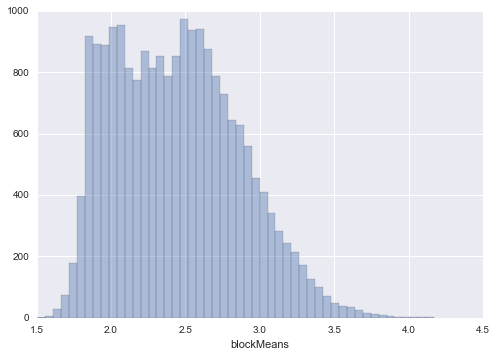

In [20]:
sns.distplot(np.log10(exons.blockMeans),kde=False);
             

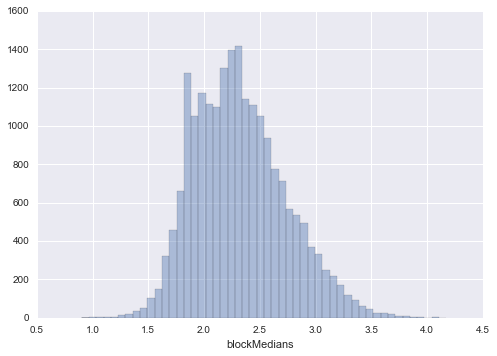

In [22]:
sns.distplot(np.log10(exons.blockMedians),kde=False);

In [24]:
e = exons.head().copy()

In [27]:
e

,chrom,chromStart,chromEnd,name,blockCount,blockSizes,blockMeans,blockMedians,genomeSpans,genomeSpans_lg10
0,JFJR01006593,4031,10761,GFUI000004,6,"[75, 33, 33, 79, 12, 74]",51.000000,53.5,6730,3.828015
1,JFJR01006593,35986,48146,GFUI000006,7,"[166, 67, 28, 17, 91, 20, 16]",57.857143,28.0,12160,4.084934
2,JFJR01006593,59266,71732,GFUI000002,9,"[476, 84, 111, 134, 112, 87, 488, 297, 3906]",632.777778,134.0,12466,4.095727
3,JFJR01006593,95368,98696,GFUI000008,4,"[287, 183, 1962, 710]",785.500000,498.5,3328,3.522183
4,JFJR01006593,99496,112398,GFUI000010,3,"[3326, 763, 407]",1498.666667,763.0,12902,4.110657


In [39]:
e.name

TypeError: ("ufunc 'add' did not contain a loop with signature matching types dtype('<U21') dtype('<U21') dtype('<U21')", u'occurred at index 0')

In [38]:
e.name

0    GFUI000004
1    GFUI000006
2    GFUI000002
3    GFUI000008
4    GFUI000010
Name: name, dtype: object

In [43]:
pd.DataFrame({k:v for (k,v) in zip(list(e.name),list(e.blockSizes))},)

ValueError: arrays must all be same length

In [23]:
pd.DataFrame(data=e.blockSizes.T, columns=e.name)

name,GFUI000004,GFUI000006,GFUI000002,GFUI000008,GFUI000010


In [23]:
e

NameError: name 'e' is not defined